In [3]:
import re

import pandas as pd
import nltk
#window will open -> models -> punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/nikesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#read in the comments csv that we got from the reddit API
comments = pd.read_csv('comments_.csv')

In [5]:
sample = comments.Reply.iloc[35]
sample

'Thanks for everything.'

In [6]:
re.sub(r'\(?http\S+', '', sample)
sample

'Thanks for everything.'

In [7]:
#remove escape characters
s = "Salut \n Comment ca va ?"
s = re.sub(r'[\n\r\t]', '', s)
s

'Salut  Comment ca va ?'

In [8]:
#remove unicode
uni = 'ï ï ï ïqwkbbqheqbï'
uni = re.sub(r'[^\x00-\x7F]+',' ', uni)
uni

'       qwkbbqheqb '

In [9]:
#remove trailing whietspace after whitespace characters
text = '       qwkbbqheqb '
text = re.sub(r'^[ \t]+|[ \t]+$','', text)
text

'qwkbbqheqb'

In [10]:
great = comments[comments.Reply.str.contains("\n")]
great

,Reply,Upvote,Time,Key
5,MY FUCKING LEGEND\n\nALWAYS A BLUE,63.0,2019-05-30 08:59:32,1.0
12,We moved from the old guard era to the Eden ha...,12.0,2019-05-30 09:32:57,1.0
19,One of the most skilful and talented players w...,7.0,2019-05-30 09:28:08,1.0
20,"First trophy in Chelsea was EL, last trophy al...",6.0,2019-05-30 09:24:43,1.0
29,"As a belgian I'm so proud of this guy, he does...",5.0,2019-05-30 12:16:52,1.0
...,...,...,...,...
48691,>You make a good point about the difference be...,1.0,2020-05-30 10:26:22,499.0
48693,Those are official accounts with social media ...,0.0,2020-05-30 05:59:14,499.0
48695,You okay bro? You just replied to like 6 of my...,0.0,2020-05-30 06:15:48,499.0
48696,"Xenophobic, whatever you want to call it.\n\nI...",2.0,2020-05-30 22:59:09,499.0


In [11]:
comments.Reply = comments.Reply.apply(lambda x: re.sub(r'[\n\r\t]', '', x) )

In [12]:
#check that we have successfully removed escape characters
great = comments[comments.Reply.str.contains("\n")]
great

,Reply,Upvote,Time,Key


In [13]:
word_tokenized = nltk.word_tokenize(sample)
word_tokenized

['Thanks', 'for', 'everything', '.']

Bigrams

In [14]:
sample = ['more', 'is', 'said', 'than', 'done', 'is', 'said', 'than']

In [15]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(sample)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print (finder.nbest(bigram_measures.pmi, 10))

[('is', 'said'), ('said', 'than')]


In [16]:
#connect all the first 10000 comments in the reply column into a single line separated by a period
all_text = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [17]:
all_text = nltk.word_tokenize(all_text)

In [18]:
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10)) # top 10 bigrams

[('provides', 'downloadable'), ('🎉', '🎉'), ('via', 'reddit.tube'), ('West', 'Ham'), ('release', 'clause'), ('Bill', 'Gates'), ('helps', 'downloading'), ('SUPER', 'FRANK'), ('HHHH', 'B'), ('social', 'media')]


Wordcloud

In [19]:
#install wordcloud into the current path
import sys
!{sys.executable} -m pip install wordcloud

In [20]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [21]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

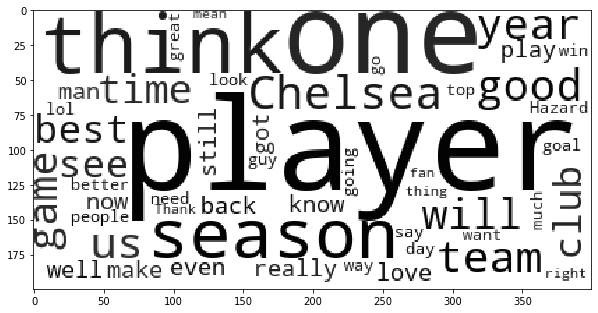

In [22]:
stp = STOPWORDS.copy()
#stp.add() #add stopwords to remove from the plot
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(sample)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

Vader Sentitment Analysis is good for analysing text posts from social media, which I'm making the assumption since how popular Reddit has become. It has become more than just a discussion forum.

Had an error downlaoding the VaderConstants Package and omitted it from the import

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#FIRST, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

Manually change the sentiment attributed to certain words

In [24]:
new_words = {
    
}
sid.lexicon.update(new_words)

In [25]:
#Create a subset of the comments from the first 50 posts
df = comments
df.shape

(48700, 4)

In [26]:
lemmatizer = nltk.WordNetLemmatizer()

In [27]:
#The cleaning steps as outlined earlier
df.Reply = df.Reply.apply(lambda x: re.sub(r'[^\w\s]', '', x) )
df.Reply = df.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))
df.Reply = df.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))
df.Reply = df.Reply.apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x))
df.Reply = df.Reply.apply(lambda x: re.sub(r'^[ \t]+|[ \t]+$', '', x))
df.Reply = df.Reply.apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]
        ) )


In [28]:
df[['neg','neu','pos','compound']] = df.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [29]:
df.head()

,Reply,Upvote,Time,Key,neg,neu,pos,compound
0,Thank you Come back if they dont appreciate you,537.0,2019-05-30 08:59:39,1.0,0.192,0.595,0.213,0.0624
1,That hit home hard he sounded emotional saying it,247.0,2019-05-30 09:00:24,1.0,0.140,0.700,0.160,0.0516
2,We got 7 year from him Thats the bulk of his c...,174.0,2019-05-30 09:12:37,1.0,0.000,1.000,0.000,0.0000
3,Dont cry because it over smile because it happ...,310.0,2019-05-30 09:04:29,1.0,0.000,0.581,0.419,0.6192
4,Thank you Eden Its been a pleasure watching yo...,71.0,2019-05-30 08:59:15,1.0,0.000,0.511,0.489,0.8225


In [30]:
#df.to_csv('df_comments.csv', index=False)